# Importing Necessary Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

# Statistics
from scipy import stats
from scipy.stats import norm

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Loading train data
train_df = pd.read_csv('train.csv')
print(f'Shape of train data: {train_df.shape}')
train_df.head()

Shape of train data: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Loading test data
test_df = pd.read_csv('test.csv')
print(f'Shape of test data: {test_df.shape}')
test_df.head()

Shape of test data: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# Duplicates Check
duplicate_ids = train_df.Id.duplicated().sum()
print(f'Total Duplicate Ids = {duplicate_ids}')

Total Duplicate Ids = 0


In [5]:
# Using Ids as Indexes
for df in [train_df, test_df]:
    df.set_index('Id', inplace=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning and Feature Engineering

In [6]:
# Data Type Check
df = pd.DataFrame({'Column': train_df.columns, 'Dtype': train_df.dtypes.astype('str').tolist(), 'Sample1': train_df.loc[1].tolist(),
                   'Sample2': train_df.loc[15].tolist(), 'Sample3': train_df.loc[100].tolist()})
print(df.to_string())

           Column    Dtype  Sample1  Sample2  Sample3
0      MSSubClass    int64       60       20       20
1        MSZoning   object       RL       RL       RL
2     LotFrontage  float64     65.0      NaN     77.0
3         LotArea    int64     8450    10920     9320
4          Street   object     Pave     Pave     Pave
5           Alley   object      NaN      NaN      NaN
6        LotShape   object      Reg      IR1      IR1
7     LandContour   object      Lvl      Lvl      Lvl
8       Utilities   object   AllPub   AllPub   AllPub
9       LotConfig   object   Inside   Corner   Inside
10      LandSlope   object      Gtl      Gtl      Gtl
11   Neighborhood   object  CollgCr    NAmes    NAmes
12     Condition1   object     Norm     Norm     Norm
13     Condition2   object     Norm     Norm     Norm
14       BldgType   object     1Fam     1Fam     1Fam
15     HouseStyle   object   2Story   1Story   1Story
16    OverallQual    int64        7        6        4
17    OverallCond    int64  

* The data type of each feature is appropriate.
* We can observe from the data description that 'MSSubClass' and 'MoSold' columns are represented by numbers when they are neither numerical nor ordinal features. Therefore, let us first convert these features to categorical features.

In [7]:
# Converting 'MSSubClass' and 'MoSold' features to categorical features
for df in [train_df, test_df]:
    df.replace({'MSSubClass': {20: 'SC20', 30: 'SC30', 40: 'SC40', 45: 'SC45', 50: 'SC50', 60: 'SC60', 70: 'SC70', 75: 'SC75',
                               80: 'SC80', 85: 'SC85', 90: 'SC90', 120: 'SC120', 150: 'SC150', 160: 'SC160', 180: 'SC180', 190: 'SC190'}, 
                'MoSold': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}},
               inplace=True)
train_df[['MSSubClass', 'MoSold']].head()

,MSSubClass,MoSold
Id,,
1,SC60,Feb
2,SC20,May
3,SC60,Sep
4,SC70,Feb
5,SC60,Dec


## Missing Values

In [8]:
# Missing Values Check
temp_train_df = train_df.drop(columns='SalePrice')
combined_df = pd.concat([temp_train_df, test_df])
print(f'Shape of combined data: {combined_df.shape}')

missing_values = combined_df.isnull().sum()
missing_values[missing_values>0]

Shape of combined data: (2919, 79)


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

* Pandas data frame interpreted 'NA' as a missing value which is not the case for few features. The meaning of 'NA' as per the data description for some features are given below:
    * Alley: No alley access
    * BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: No Basement
    * FireplaceQu: No Fireplace
    * GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt: No Garage
    * PoolQC: No Pool
    * Fence: No Fence
    * MiscFeature: No Miscellaneous Features
    Let us fill 'None' in the above columns to represent an absence of the respective facility.
* For unknown information on basement, columns 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', and 'BsmtHalfBath' will have 0 value.
* For unknown information on the garage, columns 'GarageCars' and 'GarageArea' will have 0 value.
* As 'SBrkr' is the most frequent category in the 'Electrical' column, it fills the missing values.
* As 'TA' is the most frequent category in the 'KitchenQual' column, it fills the missing values.
* By following the data description, we will fill the missing values as given below for their respective columns:
    * 'MasVnrType': 'None'
    * 'MasVnrArea': 0
    * 'Exterior1st', 'Exterior2nd': 'Other'
    * 'Functional': 'Typ'
    * 'SaleType': 'Oth'
* Neighbors are more likely to have the same zone and approximately the same linear feet of street-connected to the property. Therefore, we will go with the most frequent 'MSZoning' of the property's neighborhood and the median 'LotFrontage' of the property's neighborhood to fill the missing values.
* 'Utilities' column has 2916 entries of 'AllPub' out of a total of 2919 entries. So, we will drop this column since it is not adding any value to our prediction.

In [9]:
# Filling the Missing Values
MSZoning_series = combined_df.groupby('Neighborhood').MSZoning.agg(lambda x:x.value_counts().index[0])
LotFrontage_series = combined_df.groupby('Neighborhood').LotFrontage.median()

combined_df_filled = combined_df.fillna({'Alley': 'None', 'FireplaceQu': 'None', 'PoolQC': 'None', 'Fence': 'None', 'MiscFeature': 'None',
                                         'BsmtQual': 'None', 'BsmtCond': 'None', 'BsmtExposure': 'None', 'BsmtFinType1': 'None', 'BsmtFinType2': 'None', 
                                         'GarageType': 'None', 'GarageFinish': 'None', 'GarageQual': 'None', 'GarageCond': 'None', 'GarageYrBlt': 'None',
                                         'BsmtFinSF1': 0, 'BsmtFinSF2':0, 'BsmtUnfSF':0, 'TotalBsmtSF':0, 'BsmtFullBath':0, 'BsmtHalfBath':0, 
                                         'Electrical': 'SBrkr', 'MasVnrType': 'None', 'MasVnrArea': 0, 'Exterior1st':'Other', 'Exterior2nd':'Other',
                                         'KitchenQual': 'TA', 'Functional': 'Typ', 'SaleType':'Oth', 'GarageCars':0, 'GarageArea':0,
                                         'MSZoning': combined_df['Neighborhood'].apply(lambda x: MSZoning_series[x]),
                                         'LotFrontage': combined_df['Neighborhood'].apply(lambda x: LotFrontage_series[x])})

# Dropping the 'Utilities' Column
combined_df_filled.drop(columns=['Utilities'], inplace=True)

print(f'There are {combined_df_filled.isnull().sum().sum()} missing values.')

There are 0 missing values.


## Dependent Variable Distribution

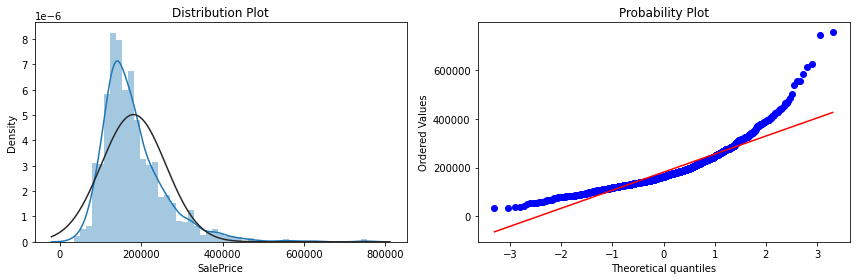

In [10]:
# Dependent Variable Distribution Check
train_df_filled = combined_df_filled.iloc[:len(train_df)]
train_df_filled = pd.concat([train_df_filled, train_df['SalePrice']], axis=1)
test_df_filled = combined_df_filled.iloc[len(train_df):]

# Figure
plt.figure(figsize=(12, 4))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(train_df_filled['SalePrice'], fit=norm)
plt.title('Distribution Plot')

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(train_df_filled['SalePrice'], plot=plt)

plt.tight_layout()
plt.show()

As the SalePrice data is skewed, we will apply log transformation so that errors in predicting expensive houses and cheap houses will affect the result equally.

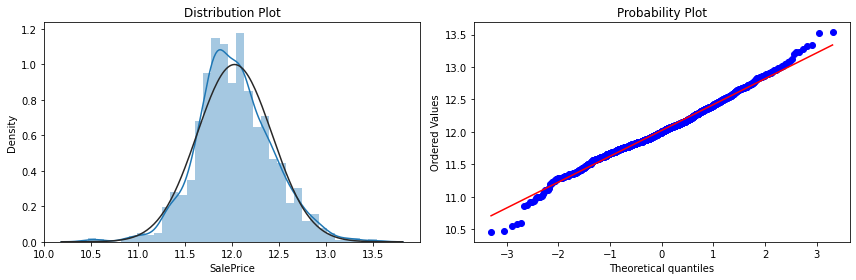

In [11]:
# Applying Log-Transform
train_df_filled['SalePrice'] = np.log1p(train_df_filled.SalePrice)

# Figure
plt.figure(figsize=(12, 4))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(train_df_filled['SalePrice'], fit=norm)
plt.title('Distribution Plot')

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(train_df_filled['SalePrice'], plot=plt)

plt.tight_layout()
plt.show()

In [12]:
# Overview of the features based on their data type
numerical_features = train_df_filled.select_dtypes(include=np.number).columns
print(f'Numerical Features ({len(numerical_features)}):\n{numerical_features}')
print('-'*80)
categorical_features = train_df_filled.select_dtypes(include=np.object).columns
print(f'Categorical Features ({len(categorical_features)}):\n{categorical_features}')

Numerical Features (34):
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')
--------------------------------------------------------------------------------
Categorical Features (45):
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual

In [13]:
# Dividing features into groups for exploratory data analysis

# Numerical Features' Groups
group1 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF']
group2 = ['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
group3 = ['GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

# Categorical Features' Groups
group4 = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl']  
group5 = ['Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
group6 = ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

## EDA: Numerical Features

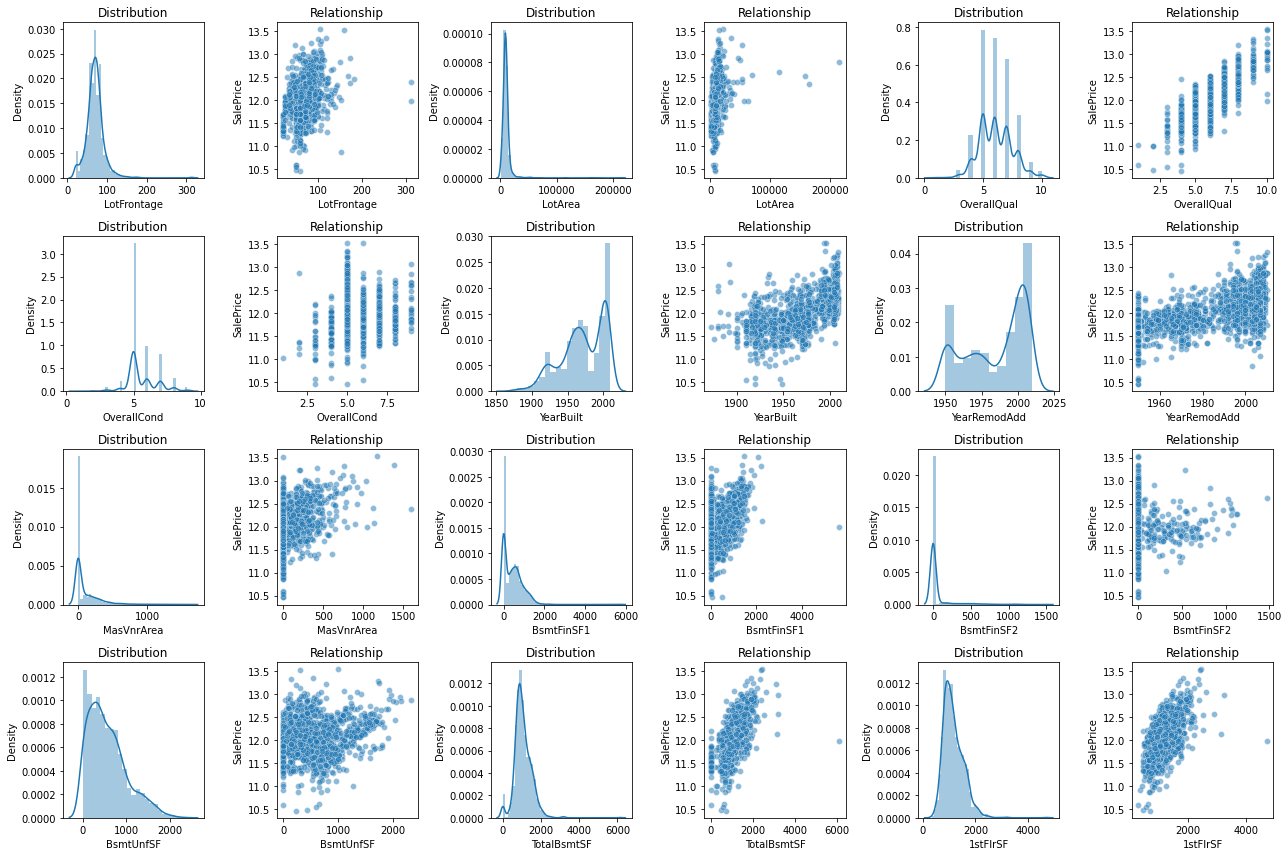

In [14]:
# EDA of Group-1
plt.figure(figsize=(18, 12))

i = 1
for col in group1:
    # Distribution Plot
    plt.subplot(4, 6, i)
    sns.distplot(train_df_filled[col])
    plt.title('Distribution')
    i += 1
    
    # Scatter Plot
    plt.subplot(4, 6, i)
    sns.scatterplot(data=train_df_filled, x=col, y='SalePrice', alpha=0.5)
    plt.title('Relationship')
    i += 1

plt.tight_layout()
plt.show()

* **Outliers**:
    * LotFrontage>200
    * LotArea>100000
    * BsmtFinSF1>4000
    * BsmtFinSF2>1200
    * TotalBsmtSF>4000
    * 1stFlrSF>4000

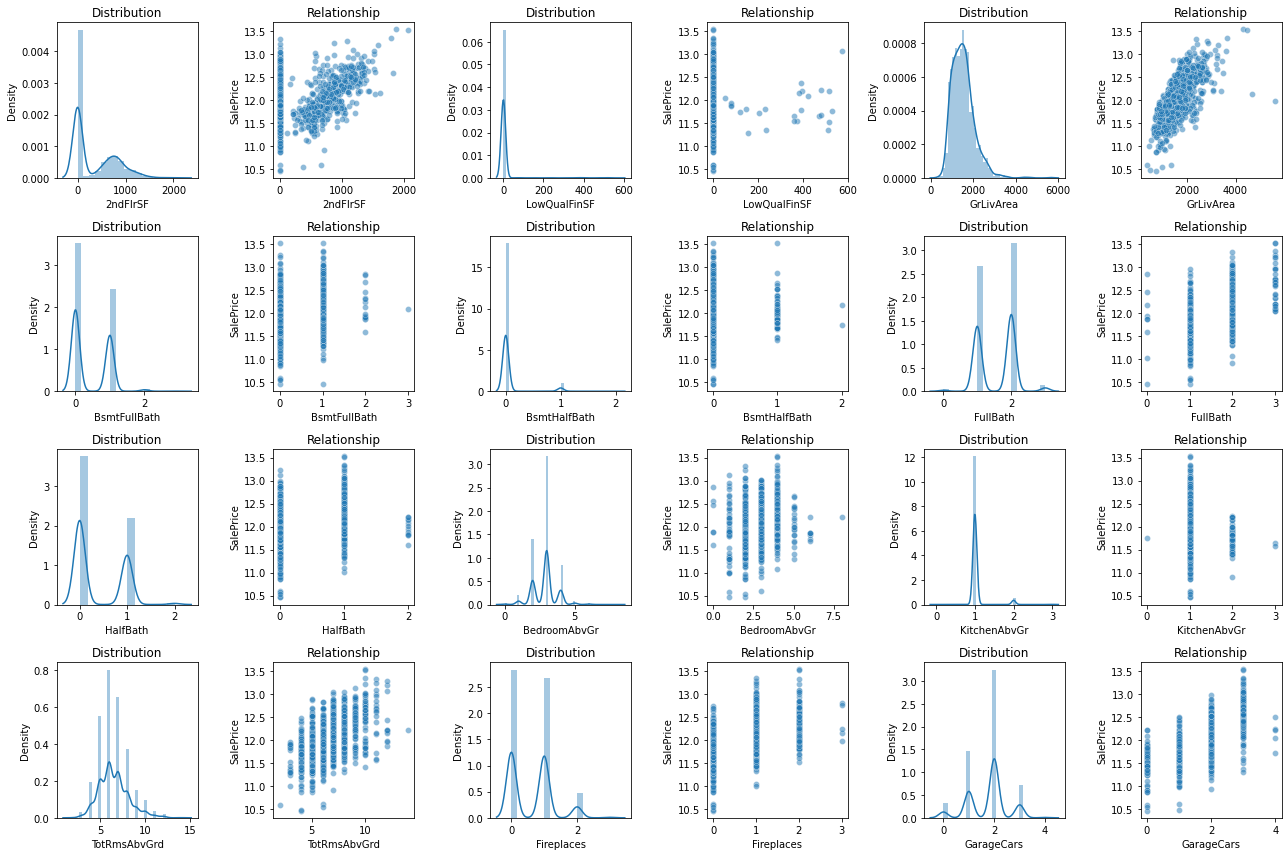

In [15]:
# EDA of Group-2
plt.figure(figsize=(18, 12))

i = 1
for col in group2:
    # Distribution Plot
    plt.subplot(4, 6, i)
    sns.distplot(train_df_filled[col])
    plt.title('Distribution')
    i += 1
    
    # Scatter Plot
    plt.subplot(4, 6, i)
    sns.scatterplot(data=train_df_filled, x=col, y='SalePrice', alpha=0.5)
    plt.title('Relationship')
    i += 1

plt.tight_layout()
plt.show()

* **Outliers**:
    * GrLivArea>4000
    * KitchenAbvGr=0
* **Feature Engineering**:
    * Has_LowQualFinSF: Yes or No
    * BsmtFullBath: Yes or No
    * BsmtHalfBath: Yes or No
    * HalfBath: Yes or No
    * BedroomAbvGr: 5 or above = 5
    * KitchenAbvGr: 2 or above = 2
    * Fireplaces: 2 or above = 2
    * GarageCars: 3 or above = 3

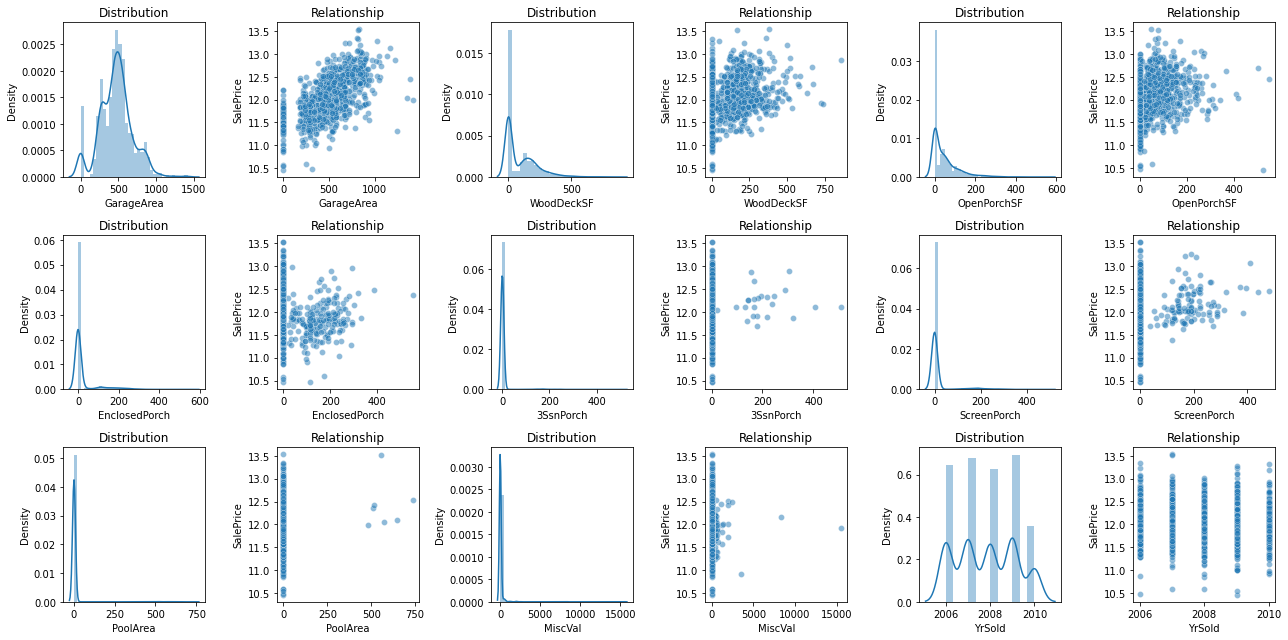

In [16]:
# EDA of Group-3
plt.figure(figsize=(18, 9))

i = 1
for col in group3:
    # Distribution Plot
    plt.subplot(3, 6, i)
    sns.distplot(train_df_filled[col])
    plt.title('Distribution')
    i += 1
    
    # Scatter Plot
    plt.subplot(3, 6, i)
    sns.scatterplot(data=train_df_filled, x=col, y='SalePrice', alpha=0.5)
    plt.title('Relationship')
    i += 1

plt.tight_layout()
plt.show()

* **Outliers**:
    * GarageArea>1300 and (GarageArea>1000 and SalePrice<11.5)
    * WoodDeckSF>800
    * OpenPorchSF>500
    * EnclosedPorch>400
    * MiscVal>3000
* **Feature Engineering**:
    * Has_3SsnPorch: Yes or No
    * Has_Pool: Yes or No

## Outliers

In [17]:
# Removing Outliers
train_df_cleaned = train_df_filled.drop(train_df_filled[(train_df_filled.LotFrontage>200)|
                                                         (train_df_filled.LotArea>100000)|
                                                         (train_df_filled.BsmtFinSF1>4000)|
                                                         (train_df_filled.BsmtFinSF2>1200)|
                                                         (train_df_filled.TotalBsmtSF>4000)|
                                                         (train_df_filled['1stFlrSF']>4000)|
                                                         (train_df_filled.GrLivArea>4000)|
                                                         (train_df_filled.KitchenAbvGr==0)|
                                                         (train_df_filled.GarageArea>1300)|
                                                         ((train_df_filled.GarageArea>1000) & (train_df_filled.SalePrice<11.5))|
                                                         (train_df_filled.WoodDeckSF>800)|
                                                         (train_df_filled.OpenPorchSF>500)|
                                                         (train_df_filled.EnclosedPorch>400)|
                                                         (train_df_filled.MiscVal>3000)].index)

print(f'Reduction in train data is {np.round(100*(len(train_df_filled)-len(train_df_cleaned))/len(train_df_filled), 2)}%')

Reduction in train data is 1.51%


## Feature Engineering: Numerical Features

In [18]:
# Feature Engineering: Numerical Features
train_df_fe1 = train_df_cleaned.copy()
test_df_fe1 = test_df_filled.copy()

for df in [train_df_fe1, test_df_fe1]:
    # Updating Existing Features
    df['BsmtFullBath'] = df['BsmtFullBath'].apply(lambda x: x if x==0 else 1)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].apply(lambda x: x if x==0 else 1)
    df['HalfBath'] = df['HalfBath'].apply(lambda x: x if x==0 else 1)
    df['BedroomAbvGr'] = df['BedroomAbvGr'].apply(lambda x: x if x<5 else 5)
    df['KitchenAbvGr'] = df['KitchenAbvGr'].apply(lambda x: x if x<2 else 2)
    df['Fireplaces'] = df['Fireplaces'].apply(lambda x: x if x<2 else 2)
    df['GarageCars'] = df['GarageCars'].apply(lambda x: x if x<3 else 3)

    # Creating New Features
    df['Has_LowQualFinSF'] = df['LowQualFinSF'].apply(lambda x: x if x==0 else 1)
    df['Has_3SsnPorch'] = df['3SsnPorch'].apply(lambda x: x if x==0 else 1)
    df['Has_Pool'] = df['PoolArea'].apply(lambda x: x if x==0 else 1)

train_df_fe1.shape

(1438, 82)

## Skewness

In [19]:
# Skewness Check
skewness = train_df_fe1.select_dtypes(exclude='object').skew()
skewed_features = skewness[skewness>0.5]
skewed_features

LotFrontage          0.531795
LotArea              4.000514
OverallCond          0.682295
MasVnrArea           2.665920
BsmtFinSF1           0.745113
BsmtFinSF2           4.134704
BsmtUnfSF            0.913990
TotalBsmtSF          0.500033
1stFlrSF             0.889546
2ndFlrSF             0.775231
LowQualFinSF         9.206385
GrLivArea            0.836640
BsmtHalfBath         3.940258
HalfBath             0.520774
KitchenAbvGr         4.382977
TotRmsAbvGrd         0.661131
Fireplaces           0.553632
WoodDeckSF           1.431890
OpenPorchSF          1.866012
EnclosedPorch        2.869811
3SsnPorch           10.224468
ScreenPorch          3.989634
PoolArea            19.395129
MiscVal              9.750007
Has_LowQualFinSF     7.392678
Has_3SsnPorch        7.553320
Has_Pool            18.901003
dtype: float64

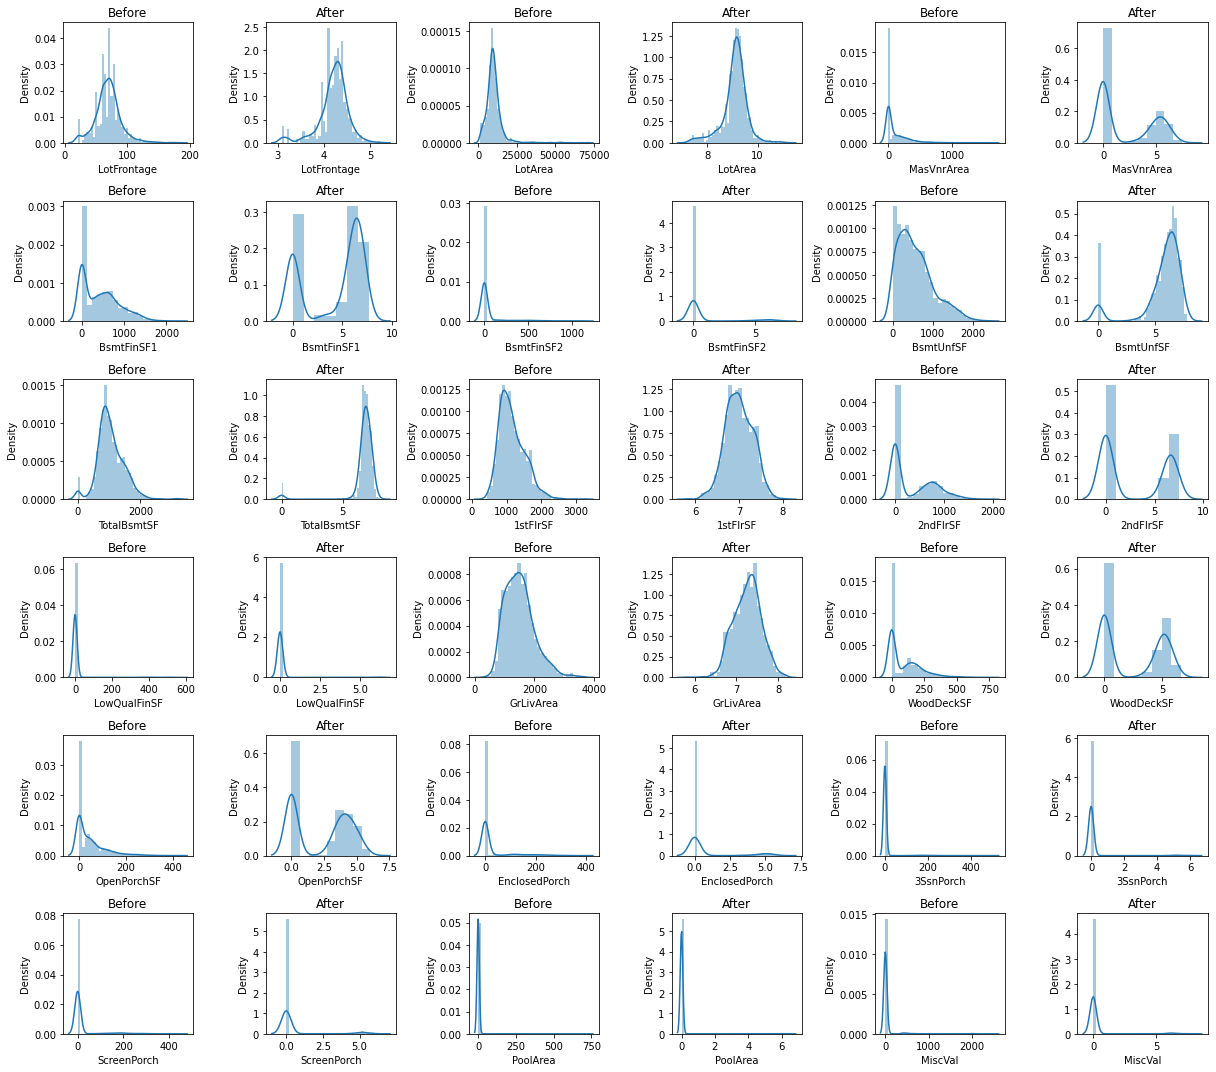

In [20]:
# Applying log transformation to the continuous variables that are skewed
feat_to_transform = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF',
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'WoodDeckSF',
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

train_df_tfm = train_df_fe1.copy()
test_df_tfm = test_df_fe1.copy()

for df in [train_df_tfm, test_df_tfm]:
    for col in feat_to_transform:
        df[col] = np.log1p(df[col])

# Plotting the before-after distribution of the transformed features
plt.figure(figsize=(17, 15))

i=1
for col in feat_to_transform:
    # Before Transformation
    plt.subplot(6, 6, i)
    sns.distplot(train_df_fe1[col])
    plt.title('Before')
    i+=1
    
    # After Transformation
    plt.subplot(6, 6, i)
    sns.distplot(train_df_tfm[col])
    plt.title('After')
    i += 1

plt.tight_layout()
plt.show()

## EDA: Categorical Features

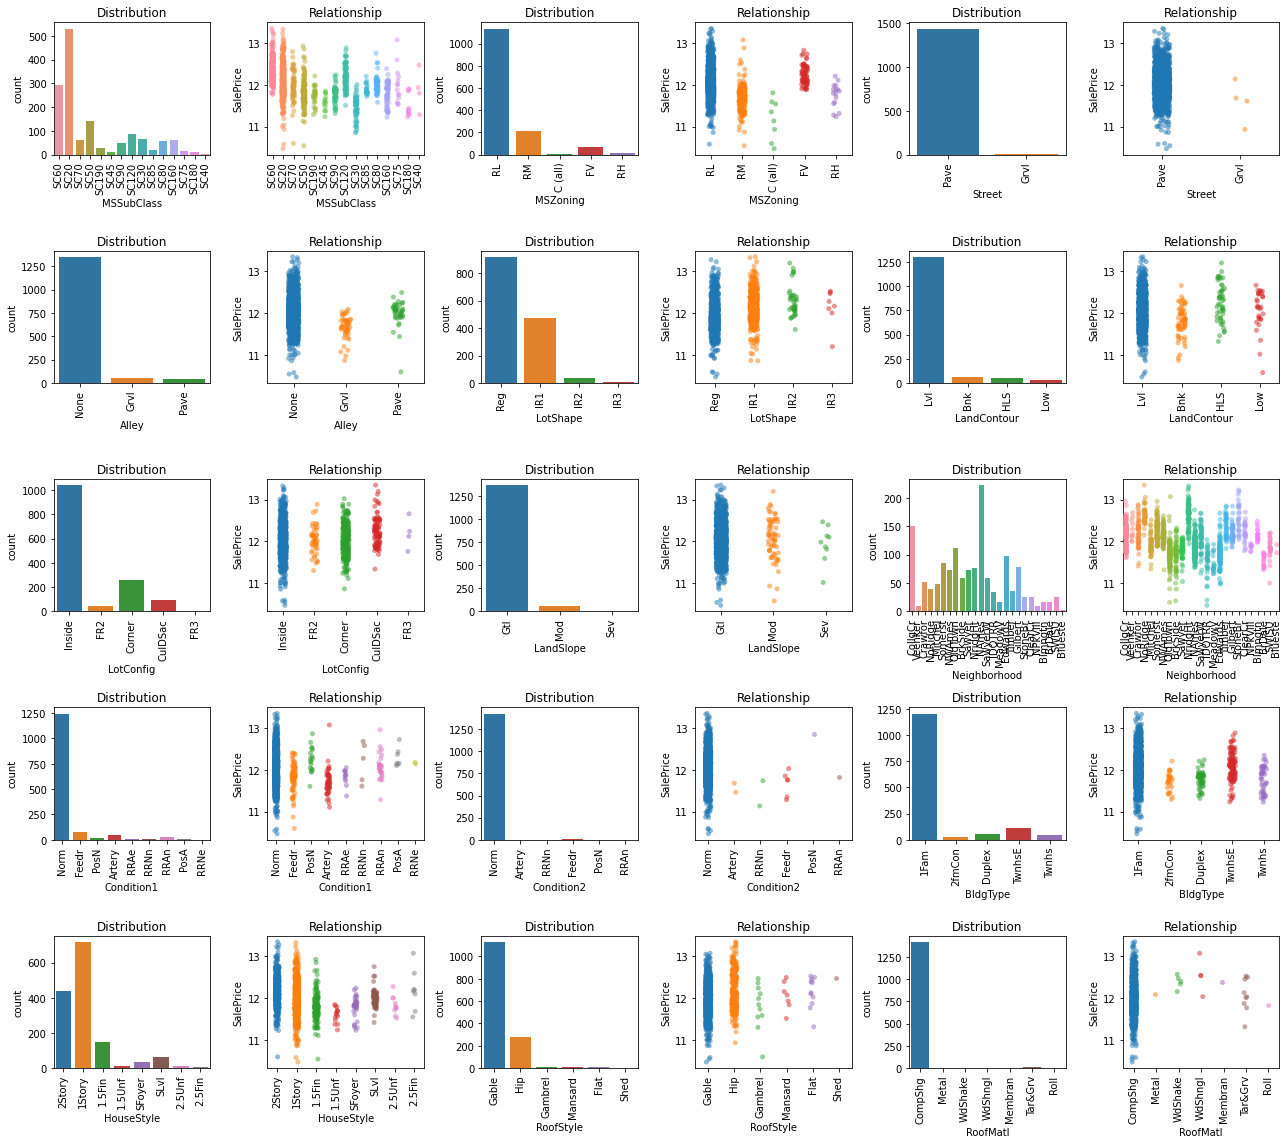

In [21]:
# EDA of Group-4
plt.figure(figsize=(18, 16))

i = 1
for col in group4:
    # Count Plot
    plt.subplot(5, 6, i)
    sns.countplot(train_df_tfm[col])
    plt.xticks(rotation=90)
    plt.title('Distribution')
    i += 1
    
    # Strip Plot
    plt.subplot(5, 6, i)
    sns.stripplot(data=train_df_tfm, x=col, y='SalePrice', alpha=0.5)
    plt.xticks(rotation=90)
    plt.title('Relationship')
    i += 1

plt.tight_layout()
plt.show()

* **Feature Engineering**:
    * MSSubClass: 'SC20', 'SC50', 'SC60', and 'Other' (Combining not so frequent categories into 'Other' category)
    * MSZoning: RL(1) or Not(0)
    * LandContour: Lvl(1) or Not(0)
    * LotConfig: Inside(1) or Not(0)
    * Neighborhood: 'NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', and 'Other'
    * Condition1: Norm(1) or Not(0)
    * Condition2: Norm(1) or Not(0)
    * BldgType: 1Fam(1) or Not(0)
    * HouseStyle: '1Story', '2Story', and 'Other'
    * RoofStyle: Gable(1) or Not(0)
    * RoofMatl: CompShg(1) or Not(0)

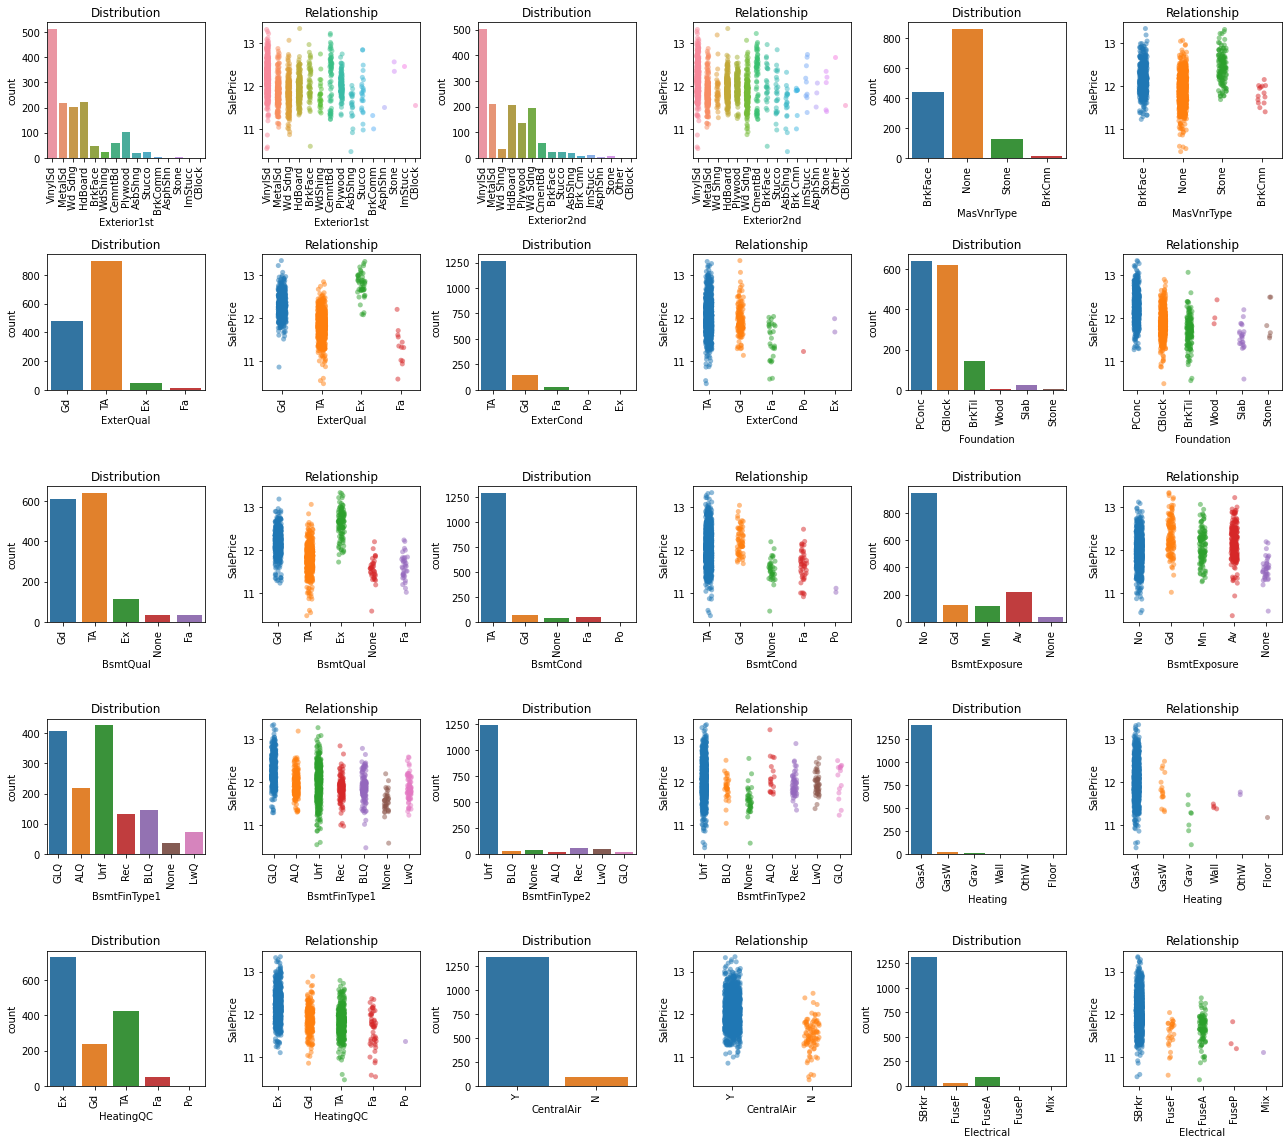

In [22]:
# EDA of Group-5
plt.figure(figsize=(18, 16))

i = 1
for col in group5:
    # Count Plot
    plt.subplot(5, 6, i)
    sns.countplot(train_df_tfm[col])
    plt.xticks(rotation=90)
    plt.title('Distribution')
    i += 1
    
    # Strip Plot
    plt.subplot(5, 6, i)
    sns.stripplot(data=train_df_tfm, x=col, y='SalePrice', alpha=0.5)
    plt.xticks(rotation=90)
    plt.title('Relationship')
    i += 1

plt.tight_layout()
plt.show()

* **Feature Engineering**:
    * Exterior1st: 'VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', and 'Other'
    * Exterior2nd: 'VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', and 'Other'
    * MasVnrType: 'None', 'BrkFace', and 'Other'
    * Foundation: 'PConc', 'CBlock', and 'Other
    * Heating: GasA(1) or Not(0)
    * Electrical: SBrkr(1) or Not(0)

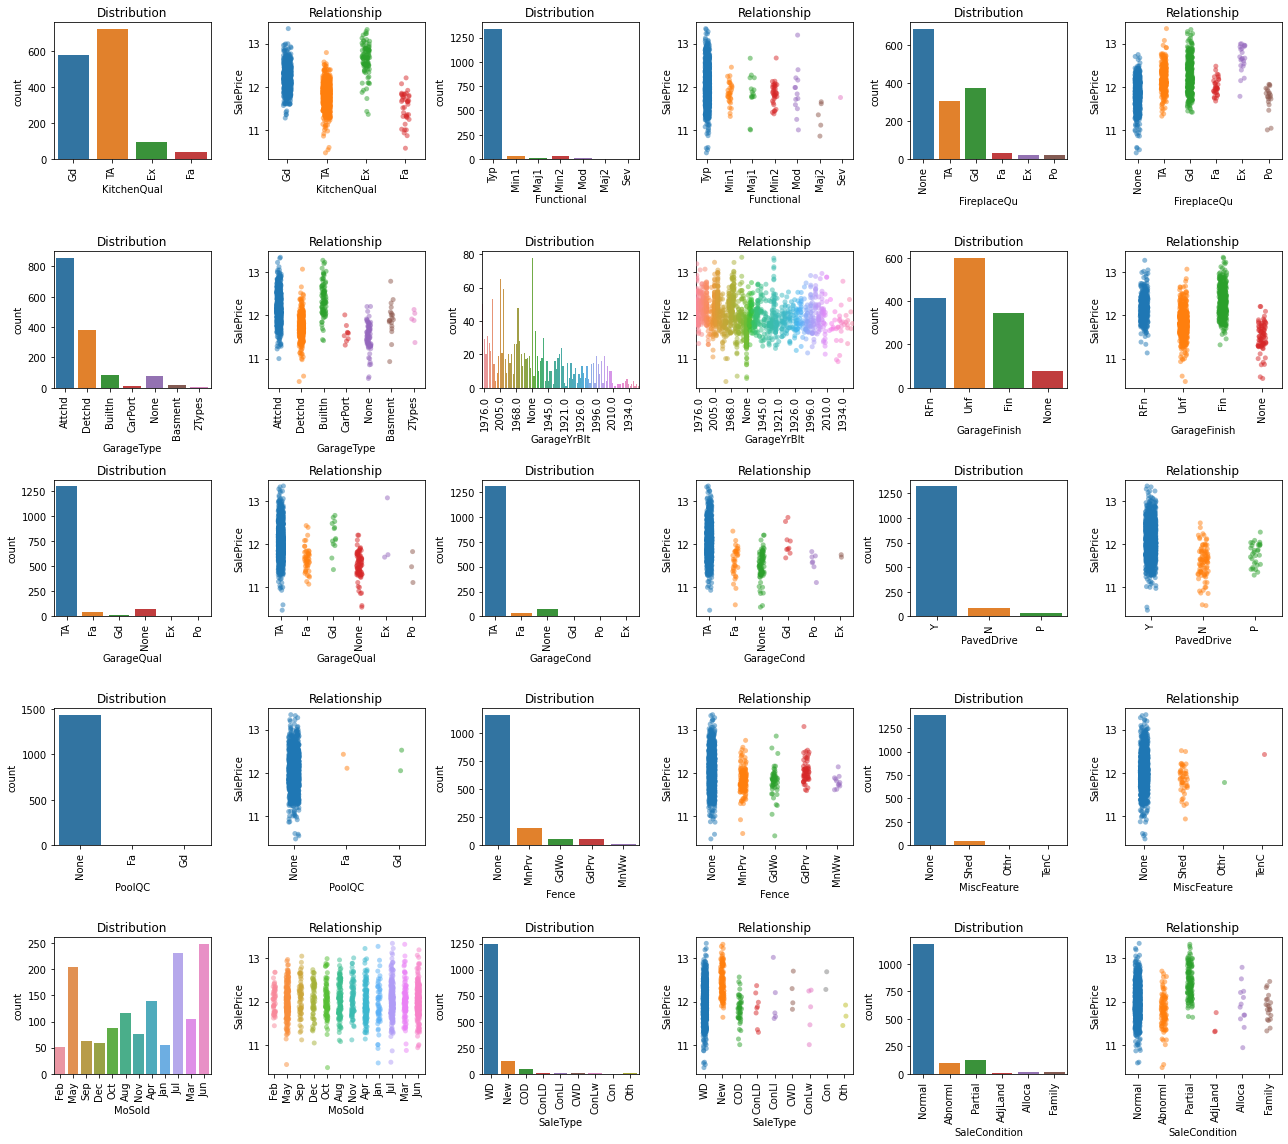

In [23]:
# EDA of Group-6
plt.figure(figsize=(18, 16))

i = 1
for col in group6:
    # Count Plot
    plt.subplot(5, 6, i)
    sns.countplot(train_df_tfm[col])
    if col=='GarageYrBlt':
        temp_lst = train_df_tfm.GarageYrBlt.unique()
        ticks = range(1, len(temp_lst), 10)
        labels = [temp_lst[i] for i in ticks]
        plt.xticks(ticks=ticks, labels=labels, rotation=90)
    else:
        plt.xticks(rotation=90)
    plt.title('Distribution')
    i += 1
    
    # Strip Plot
    plt.subplot(5, 6, i)
    sns.stripplot(data=train_df_tfm, x=col, y='SalePrice', alpha=0.5)
    if col=='GarageYrBlt':
        plt.xticks(ticks=ticks, labels=labels, rotation=90)
    else:
        plt.xticks(rotation=90)
    plt.title('Relationship')
    i += 1

plt.tight_layout()
plt.show()

* **Feature Engineering**:
    * GarageType: 'Attchd', 'Detchd', 'None', and 'Other'
    * MiscFeature: Available(1) or Not(0)
    * SaleType: WD(1) or Not(0)
    * SaleCondition: Normal(1) or Not(0)

## Feature Engineering: Categorical Features

In [24]:
# Feature Engineering: Categorical Features
train_df_fe2 = train_df_tfm.copy()
test_df_fe2 = test_df_tfm.copy()

for df in [train_df_fe2, test_df_fe2]:
    # Updating Existing Features
    df['MSSubClass'] = df['MSSubClass'].apply(lambda x: x if x in ['SC20', 'SC50', 'SC60'] else 'Other')
    df['MSZoning'] = df['MSZoning'].apply(lambda x: 1 if x=='RL' else 0)
    df['LandContour'] = df['LandContour'].apply(lambda x: 1 if x=='Lvl' else 0)
    df['LotConfig'] = df['LotConfig'].apply(lambda x: 1 if x=='Inside' else 0)
    df['Neighborhood'] = df['Neighborhood'].apply(lambda x: x if x in ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 
                                                                       'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes'] else 'Other')
    df['Condition1'] = df['Condition1'].apply(lambda x: 1 if x=='Norm' else 0)
    df['Condition2'] = df['Condition2'].apply(lambda x: 1 if x=='Norm' else 0)
    df['BldgType'] = df['BldgType'].apply(lambda x: 1 if x=='1Fam' else 0)
    df['HouseStyle'] = df['HouseStyle'].apply(lambda x: x if x in ['1Story', '2Story'] else 'Other')
    df['RoofStyle'] = df['RoofStyle'].apply(lambda x: 1 if x=='Gable' else 0)
    df['RoofMatl'] = df['RoofMatl'].apply(lambda x: 1 if x=='CompShg' else 0)
    df['Exterior1st'] = df['Exterior1st'].apply(lambda x: x if x in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood'] else 'Other')
    df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: x if x in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood'] else 'Other')
    df['MasVnrType'] = df['MasVnrType'].apply(lambda x: x if x in ['None', 'BrkFace'] else 'Other')
    df['Foundation'] = df['Foundation'].apply(lambda x: x if x in ['PConc', 'CBlock'] else 'Other')
    df['Heating'] = df['Heating'].apply(lambda x: 1 if x=='GasA' else 0)
    df['Electrical'] = df['Electrical'].apply(lambda x: 1 if x=='SBrkr' else 0)
    df['GarageType'] = df['GarageType'].apply(lambda x: x if x in ['Attchd', 'Detchd', 'None'] else 'Other')
    df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 0 if x=='None' else 1)
    df['SaleType'] = df['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
    df['SaleCondition'] = df['SaleCondition'].apply(lambda x: 1 if x=='Normal' else 0)

train_df_fe2.shape

(1438, 82)

## Label Encoding

In [25]:
# Label Encoding
train_df_encoded1 = train_df_fe2.copy()
test_df_encoded1 = test_df_fe2.copy()

for df in [train_df_encoded1, test_df_encoded1]:
    df.replace({'Street': {'Grvl':0, 'Pave':1},
                'Alley': {'None':0, 'Grvl':1, 'Pave':2},
                'LotShape': {'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3},
                'LandSlope': {'Gtl':0, 'Mod':1, 'Sev':2},
                'ExterQual': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                'ExterCond': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                'BsmtQual': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'BsmtCond': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'BsmtExposure': {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                'BsmtFinType1': {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'BsmtFinType2': {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'HeatingQC': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                'CentralAir': {'N':0, 'Y':1},
                'KitchenQual': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                'Functional': {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7},
                'FireplaceQu': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'GarageFinish': {'None':0, 'Unf':1, 'RFn':2, 'Fin':3},
                'GarageQual': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'GarageCond': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'PavedDrive': {'N':0, 'P':1, 'Y':2},
                'PoolQC': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Fence': {'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}}, inplace=True)

## Feature Engineering: Combining Multiple Features
During feature engineering of numerical and categorical features above, we modified individual features to better predict our SalePrice. In this section, we will create new features by combining multiple existing features.

In [26]:
# Feature Engineering: Combining Multiple Features
train_df_fe = train_df_encoded1.copy()
test_df_fe = test_df_encoded1.copy()

for df in [train_df_fe, test_df_fe]:
    # Age of the house when sold
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    # Years passed after remodeling of the house when sold
    df['HouseRemodAge'] = df['YrSold'] - df['YearRemodAdd']
    # Age of garage when house was sold
    df['GarageAge'] = df[['YrSold', 'GarageYrBlt']].apply(lambda row: 0 if row[1]=='None' else (row[0]-int(row[1])), axis=1)

    # Overall rating
    df['OverallRating'] = df['OverallQual']*df['OverallCond']
    # Exterior rating
    df['ExteriorRating'] = df['ExterQual']*df['ExterCond']
    # Basement rating
    df['BsmtRating'] = df['BsmtQual']*df['BsmtCond']
    # Total basement finish area
    df['BsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
    # Basement finish type 1 score
    df['BsmtFinScore1'] = df['BsmtFinSF1']*df['BsmtFinType1']
    # Basement finish type 2 score
    df['BsmtFinScore2'] = df['BsmtFinSF2']*df['BsmtFinType2']
    # Total basement finish score
    df['BsmtFinScore'] = df['BsmtFinScore1'] + df['BsmtFinScore2']
    # Kitchen score
    df['KitchenScore'] = df['KitchenAbvGr']*df['KitchenQual']
    # Fireplace score
    df['FireplaceScore'] = df['Fireplaces']*df['FireplaceQu']
    # Garage rating
    df['GarageRating'] = df['GarageQual']*df['GarageCond']
    # Garage score
    df['GarageScore'] = df['GarageArea']*df['GarageRating']
    # Pool score
    df['PoolScore'] = df['PoolArea']*df['PoolQC']

    # Total living area
    df['TotalLivArea'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] 
    # Total porch area
    df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    # Total outside area
    df['TotalOutArea'] = df['TotalPorchArea'] + df['WoodDeckSF'] + df['PoolArea'] + df['GarageArea']
    # Total house area
    df['TotalHouseArea'] = df['TotalOutArea'] + df['TotalLivArea']

    # Whether house has masonry veneer
    df['Has_MasVnr'] = df['MasVnrType'].apply(lambda x: 0 if x=='None' else 1)
    # Whether house's basement is finished
    df['Is_BsmtFin'] = df[['BsmtFinType1', 'BsmtFinType1']].apply(lambda row: 0 if (row[0]==1 and row[1]==1) else 1, axis=1)
    # Whether house has a basement
    df['Has_Bsmt'] = df['BsmtFinType1'].apply(lambda x: 0 if x==0 else 1)
    # Whether house has a fireplace
    df['Has_Fireplace'] = df['Fireplaces'].apply(lambda x: 0 if x==0 else 1)
    # Whether house has a garage
    df['Has_Garage'] = df['GarageType'].apply(lambda x: 0 if x=='None' else 1)
    # Whether house has porch
    df['Has_Porch'] = df['TotalPorchArea'].apply(lambda x: 0 if x==0 else 1)
    # Whether house has a wood deck
    df['Has_WoodDeck'] = df['WoodDeckSF'].apply(lambda x: 0 if x==0 else 1)
    # Whether house has a fence
    df['Has_Fence'] = df['Fence'].apply(lambda x: 0 if x==0 else 1)

    # Garage average area per car
    df['GarageArPCr'] = df[['GarageArea', 'GarageCars']].apply(lambda row: 0 if (row[0]==0 or row[1]==0) else (row[0]/row[1]), axis=1)

train_df_fe.shape

(1438, 110)

# Data Preprocessing
Since categorical features can create redundant columns after one-hot encoding, they are inspected to understand their impact on SalePrice prediction. The following 6 out of 10 categorical features were identified as irrelevant based on intuition, EDA, and results of iterative prediction of SalePrice: GarageYrBlt, MoSold, MSSubClass, Exterior2nd, MasVnrType, and Foundation.

In [27]:
# Feature Selection: Dropping Irrelevant Features
train_df_fs = train_df_fe.copy()
test_df_fs = test_df_fe.copy()

for df in [train_df_fs, test_df_fs]:
    df.drop(columns=['GarageYrBlt', 'MoSold', 'MSSubClass', 'Exterior2nd', 'MasVnrType', 'Foundation'], inplace=True)

# One-Hot Encoding
train_df_encoded2 = pd.get_dummies(train_df_fs, drop_first=True)
test_df_encoded2 = pd.get_dummies(test_df_fs, drop_first=True)

# Preparing train-test arrays 
x_train = train_df_encoded2.drop(columns='SalePrice').values
y_train = train_df_encoded2['SalePrice'].values
x_test = test_df_encoded2.values
print(f'Shape: x_train{x_train.shape} x_test{x_test.shape} y_train{y_train.shape}')

Shape: x_train(1438, 118) x_test(1459, 118) y_train(1438,)


# ML Modeling
## Multiple Linear Regression

In [28]:
# Multiple Linear Regression
mlr = LinearRegression()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = np.sqrt(-cross_val_score(mlr, x_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
print(f'Multiple Linear Regression: RMSE={round(np.mean(scores), 4)}')

Multiple Linear Regression: RMSE=0.1154


## Ridge Regression (L2 Regularization)

In [29]:
# Ridge Regression (L2 Regularization)
alphas = np.arange(1, 10, 1)
ridge = RidgeCV(alphas, normalize=True)
ridge.fit(x_train, y_train)
best_alpha = ridge.alpha_

iterations = 5
for i in range(iterations):
    alphas = [best_alpha*x for x in np.arange(0.1, 2, 0.1)]
    ridge = RidgeCV(alphas, normalize=True)
    ridge.fit(x_train, y_train)
    best_alpha = ridge.alpha_

scores = np.sqrt(-cross_val_score(ridge, x_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
print(f'Ridge Regression: Best Alpha={round(best_alpha, 4)} RMSE={round(np.mean(scores), 4)}')

Ridge Regression: Best Alpha=0.008 RMSE=0.1151


## Lasso Regression (L1 Regularization)

In [30]:
# Lasso Regression (L1 Regularization)
lasso = LassoCV(alphas=None, max_iter=100000, normalize=True)
lasso.fit(x_train, y_train)
best_alpha = lasso.alpha_
scores = np.sqrt(-cross_val_score(lasso, x_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
print(f'Lasso Regression: Best Alpha={round(best_alpha, 4)} RMSE={round(np.mean(scores), 4)}')

Lasso Regression: Best Alpha=0.0 RMSE=0.1142


Lasso regression can be seen to perform better than multiple linear regression and ridge regression. Lasso regression turns out to have 0 as the best alpha value, which signifies that there is no bias imposed, and results are improved solely because of lasso's feature selection ability.

# Prediction

In [31]:
# Predicting SalePrice of the test data using Lasso Regression
lasso.fit(x_train, y_train)
y_pred_log1p = lasso.predict(x_test)
y_pred = np.expm1(y_pred_log1p)

# Submitting Prediction
submission = pd.DataFrame({'Id': test_df_encoded2.index, 'SalePrice': y_pred})
submission.to_csv('submission.csv', index=False)
print('Submission is successful.')

Submission is successful.
